<a href="https://colab.research.google.com/github/SweathaPappachan/DTTE-SweathaPappachan/blob/main/Project/Stock%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting Stock Prices of Netflix Using Machine Learning

In [3]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor  # Corrected class name
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [4]:
# to load dataset
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [5]:
df = pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900


In [6]:
df.shape

(1009, 7)

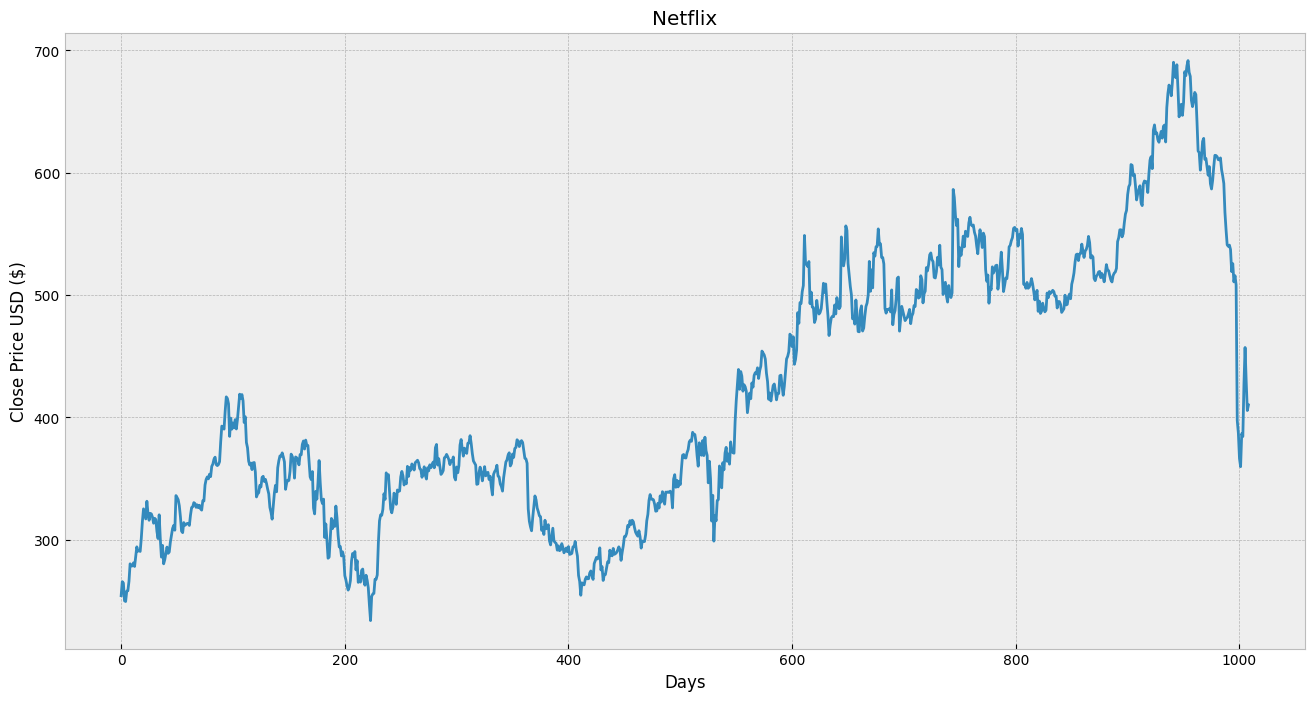

In [12]:
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [15]:
df = df[['Close']]
df.head(4)


,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006


In [31]:
future_days = 200

df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,prediction,Prediction
1005,457.130005,NaN,NaN
1006,429.480011,NaN,NaN
1007,405.600006,NaN,NaN
1008,410.170013,NaN,NaN


In [33]:
from re import X
x = np.array(df.drop(['Prediction'],1))[:-future_days]
print(x)

[[254.259995 315.880005]
 [265.720001 321.549988]
 [264.559998 321.089996]
 ...
 [549.570007 501.339996]
 [508.899994 502.359985]
 [508.779999 503.859985]]


<ipython-input-33-f3b89d791007>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(['Prediction'],1))[:-future_days]


In [34]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[270.600006 266.980011 262.130005 258.820007 261.429993 266.630005
 282.649994 288.75     286.130005 290.299988 275.329987 282.880005
 265.140015 269.700012 265.320007 274.880005 276.019989 266.839996
 262.799988 270.940002 266.769989 260.579987 246.389999 233.880005
 253.669998 255.570007 256.079987 267.660004 267.660004 271.200012
 297.570007 315.339996 320.269989 319.959991 324.660004 337.589996
 332.940002 354.640015 351.390015 353.190002 339.100006 325.160004
 321.98999  326.670013 338.049988 335.660004 328.899994 340.660004
 339.5      339.850006 351.339996 355.809998 352.190002 344.709991
 347.570007 345.730011 359.970001 351.769989 359.070007 356.869995
 361.920013 359.910004 356.970001 363.019989 363.910004 364.970001
 362.869995 358.100006 357.320007 351.040009 354.299988 359.609985
 352.600006 349.600006 358.859985 356.269989 361.209991 358.820007
 361.459991 363.440002 358.779999 375.220001 377.869995 361.01001
 366.230011 359.970001 353.369995 354.609985 356.559998 366.959

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [36]:
tree = DecisionTreeRegressor().fit(x_train, y_train)

lr = LinearRegression().fit(x_train, y_train)

In [37]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-37-2cacd72a4a59>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Prediction'], 1)[:-future_days]


array([[502.779999, 475.470001],
       [507.76001 , 481.329987],
       [548.72998 , 482.679993],
       [525.5     , 482.350006],
       [524.880005, 491.869995],
       [523.26001 , 484.529999],
       [527.390015, 497.899994],
       [492.98999 , 492.309998],
       [502.410004, 488.809998],
       [490.100006, 490.579987],
       [489.820007, 547.530029],
       [477.579987, 526.27002 ],
       [480.450012, 523.890015],
       [495.649994, 529.559998],
       [488.51001 , 556.549988],
       [484.480011, 552.840027],
       [485.799988, 525.75    ],
       [488.880005, 516.049988],
       [498.619995, 507.019989],
       [509.640015, 500.190002],
       [502.109985, 480.670013],
       [509.079987, 482.029999],
       [494.730011, 476.26001 ],
       [483.380005, 495.98999 ],
       [466.929993, 483.859985],
       [475.470001, 470.200012],
       [481.329987, 469.959991],
       [482.679993, 487.350006],
       [482.350006, 491.170013],
       [491.869995, 470.609985],
       [48

In [38]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)

[505.549988 510.299988 505.549988 520.549988 509.       509.
 509.109985 503.179993 496.079987 499.549988 503.839996 486.690002
 598.719971 484.980011 486.660004 493.369995 488.940002 582.869995
 487.700012 501.670013 497.890015 502.899994 508.899994 502.359985
 553.72998  502.809998 499.079987 499.23999  489.429993 494.73999
 494.660004 492.390015 485.809998 487.269989 488.769989 499.890015
 491.899994 547.580017 498.339996 500.769989 497.       508.820007
 624.940002 664.780029 527.070007 582.070007 582.070007 528.210022
 484.980011 494.660004 541.640015 535.960022 530.76001  535.97998
 537.309998 540.679993 499.079987 542.950012 530.309998 532.280029
 531.049988 513.630005 511.769989 515.409973 516.48999  518.909973
 519.299988 514.25     517.570007 515.150024 510.820007 517.349976
 519.299988 520.549988 519.969971 515.840027 499.549988 510.720001
 515.919983 517.919983 518.909973 521.869995 606.049988 546.880005
 586.5      553.409973 547.580017 550.119995 558.919983 597.539978
 56

<ipython-input-39-b7ba157aaa51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


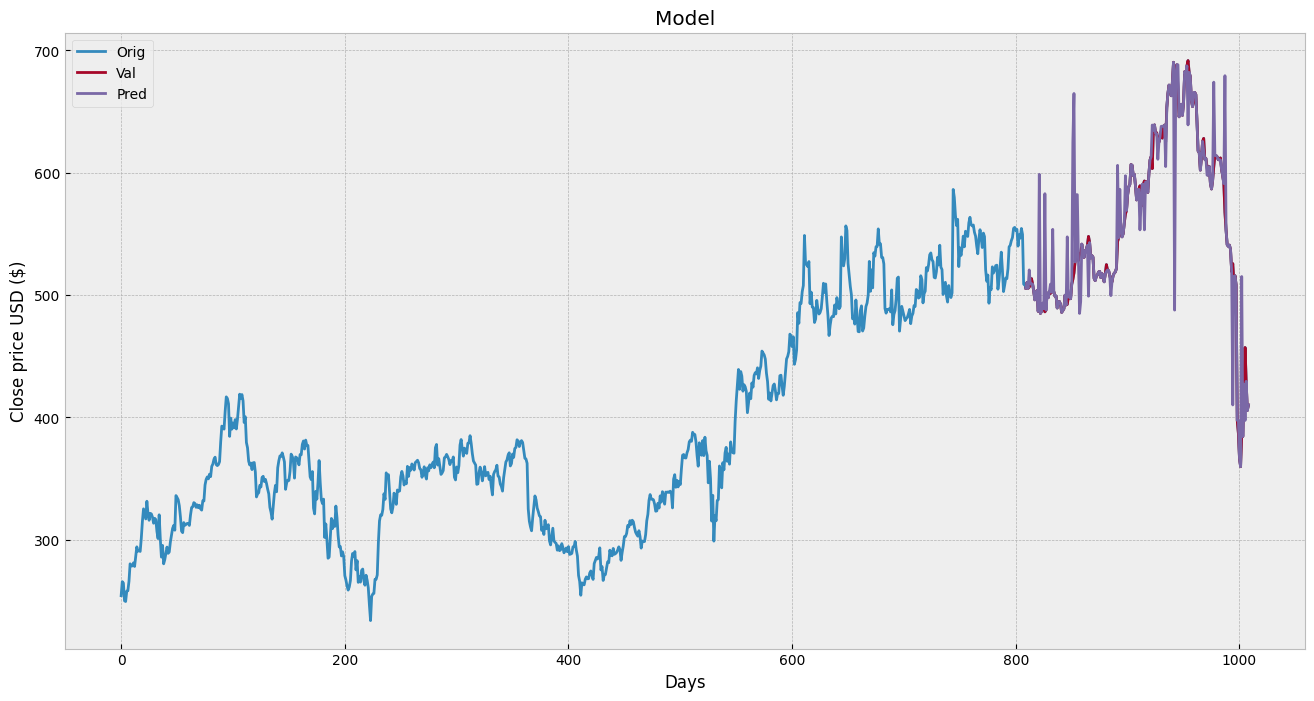

In [39]:
predictions = tree_prediction

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

<ipython-input-40-0aec52f76c0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


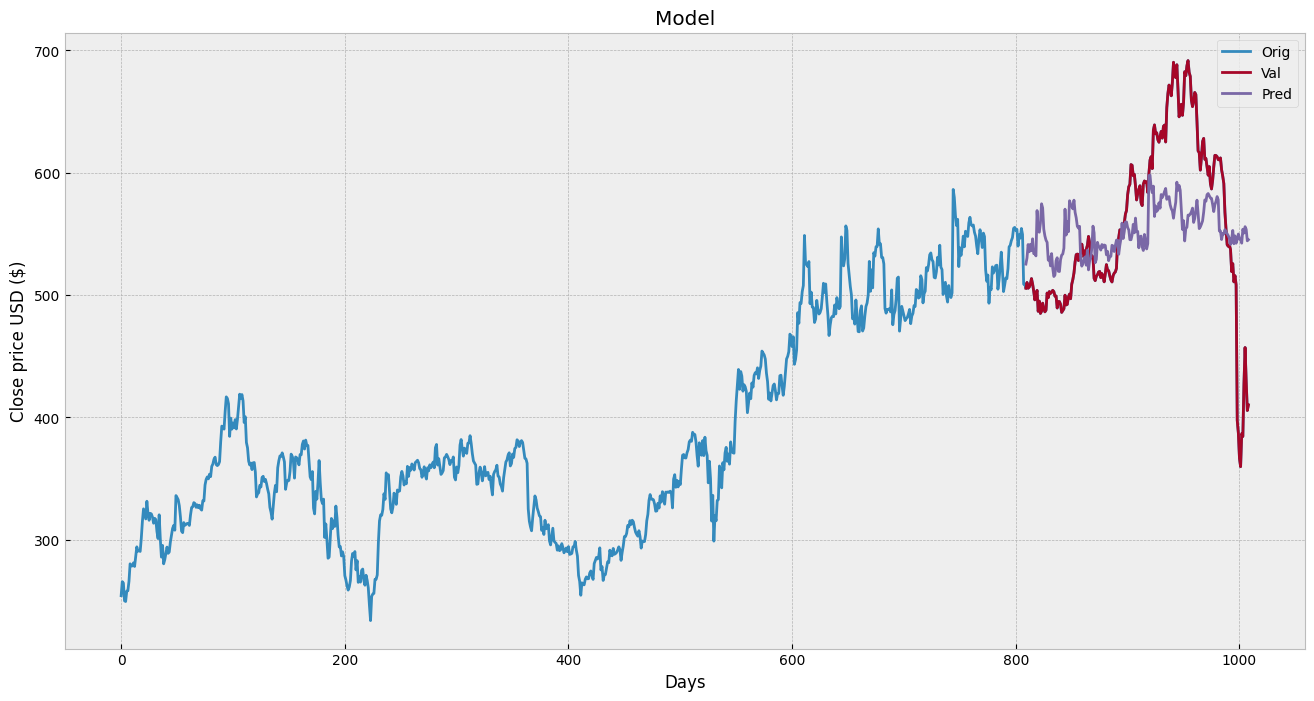

In [40]:
predictions = lr_prediction

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()